In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
def rmse(predictor,target):
    return np.sqrt(((predictor - target) ** 2).mean())

In [3]:
df = pd.read_csv('../data/train.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
#Check for any null values
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [7]:
#Fill the null values with 0

df.fillna(0, inplace= True)

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [9]:
df = df.astype({'Product_Category_2': int, 'Product_Category_3': int})

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [11]:
#Mapping gender values
gender = {'F':0, 'M':1}

df['Gender'] = df['Gender'].map(gender)
df = df.rename(columns={'Gender': 'isMale'})

In [12]:
df.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0,0,7969


In [13]:
df.sort_values('Age', inplace=True)
df.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0,0,8370
48932,1001499,P00100442,1,0-17,10,C,1,0,2,4,5,13129
48933,1001499,P00255842,1,0-17,10,C,1,0,16,0,0,20195
48934,1001499,P00070342,1,0-17,10,C,1,0,1,2,14,15819
48935,1001499,P00275542,1,0-17,10,C,1,0,1,0,0,7587


In [14]:
df['Age'] = df['Age'].factorize()[0]

In [15]:
df.tail()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
47161,1001252,P00357242,1,6,13,C,3,0,5,0,0,7134
47162,1001252,P00322942,1,6,13,C,3,0,2,8,16,16325
114629,1005686,P00101942,1,6,16,A,1,1,8,17,0,4056
188070,1005033,P00112342,0,6,13,C,1,1,13,16,0,936
132077,1002280,P00004142,1,6,6,B,2,1,8,17,0,7900


Mapping Age column to dummy values:

0-17: 0<br>
18-25: 1<br>
26-35: 2<br>
36-45: 3<br>

46-50: 4

51-55: 5

55+ : 6


In [16]:
city = {'A': 1, 'B': 2, 'C':3}

df['City_Category'] = df['City_Category'].map(city)

df.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,1,2,0,3,0,0,8370
48932,1001499,P00100442,1,0,10,3,1,0,2,4,5,13129
48933,1001499,P00255842,1,0,10,3,1,0,16,0,0,20195
48934,1001499,P00070342,1,0,10,3,1,0,1,2,14,15819
48935,1001499,P00275542,1,0,10,3,1,0,1,0,0,7587


In [17]:
df['Stay_In_Current_City_Years'].replace({'4+':4}, inplace=True)

In [18]:
df['Product_ID'] = df['Product_ID'].str[1:] # Drop the first character ‘P’ from product id
df = df.astype({'Product_ID':int,'Stay_In_Current_City_Years':int}) # Recast all strings as ints

In [19]:
train, test = train_test_split(df,test_size=0.3)

In [20]:
X = train.drop('Purchase',axis=1)
y = train.Purchase

In [21]:
np.asarray(X)

array([[1005792,  122542,       1, ...,      11,       0,       0],
       [1004378,  256042,       1, ...,       6,       8,      16],
       [1005168,  110742,       1, ...,       1,       2,       8],
       ...,
       [1005763,  213742,       0, ...,       8,       0,       0],
       [1001019,  331842,       1, ...,      16,       0,       0],
       [1003905,   22942,       1, ...,       5,       8,       0]])

In [22]:
multivar_model = sm.OLS(y,sm.add_constant(X)).fit()

In [23]:
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     6424.
Date:                Mon, 26 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:40:27   Log-Likelihood:            -3.7953e+06
No. Observations:              385047   AIC:                         7.591e+06
Df Residuals:                  385035   BIC:                         7.591e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1804.3627   4331.668     -0.417      0.677   -1.03e+04    6685.577
User_ID                        0.0114      0.004      2.647      0.008       0.003       0.020
Product_ID                    -0.0028   7.35e-05    -37.730      0.000      -0.003      -0.003
isMale                       483.9864     17.421     27.782      0.000     449.843     518.130
Age                          112.9798      5.867     19.256      0.000     101.480     124.479
Occupation                     6.8279      1.154      5.917      0.000       4.566       9.090
City_Category                334.5750      9.873     33.888      0.000     315.224     353.926
Stay_In_Current_City_Years     6.5017      5.781      1.125      0.261      -4.830      17.833
Marital_Status               -56.2091     15.929     -3.529      0.000     -87.430     -24.988
Product_Category_1          -345.7466      2.053   -168.424      0.000    -349.770    -341.723
Product_Category_2             8.4680      1.207      7.014      0.000       6.102      10.834
Product_Category_3           136.9992      1.304    105.032      0.000     134.443     139.556
==============================================================================
Omnibus:                    39158.288   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54085.557
Skew:                           0.822   Prob(JB):                         0.00
Kurtosis:                       3.820   Cond. No.                     5.93e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sta_In_Current_City_Years has a p-value >= 0.05, so it will be dropped.

In [24]:
X = train.drop(columns=['Purchase','Stay_In_Current_City_Years'],axis=1)
X.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
115281,1005792,122542,1,2,17,2,1,11,0,0
106344,1004378,256042,1,1,17,2,0,6,8,16
423463,1005168,110742,1,3,7,3,1,1,2,8
321867,1001587,332042,0,2,3,2,0,8,16,0
12113,1001827,84842,0,2,1,3,0,8,16,0


In [25]:
multivar_model = sm.OLS(y,sm.add_constant(X)).fit()
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     7066.
Date:                Mon, 26 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:40:28   Log-Likelihood:            -3.7953e+06
No. Observations:              385047   AIC:                         7.591e+06
Df Residuals:                  385036   BIC:                         7.591e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1643.1510   4329.297     -0.380      0.704   -1.01e+04    6842.141
User_ID                0.0113      0.004      2.613      0.009       0.003       0.020
Product_ID            -0.0028   7.35e-05    -37.736      0.000      -0.003      -0.003
isMale               484.2133     17.419     27.797      0.000     450.072     518.355
Age                  112.9569      5.867     19.252      0.000     101.457     124.456
Occupation             6.8641      1.154      5.950      0.000       4.603       9.125
City_Category        334.8082      9.871     33.919      0.000     315.462     354.155
Marital_Status       -56.4174     15.928     -3.542      0.000     -87.636     -25.199
Product_Category_1  -345.7553      2.053   -168.430      0.000    -349.779    -341.732
Product_Category_2     8.4689      1.207      7.015      0.000       6.103      10.835
Product_Category_3   136.9957      1.304    105.030      0.000     134.439     139.552
==============================================================================
Omnibus:                    39157.273   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54083.686
Skew:                           0.821   Prob(JB):                         0.00
Kurtosis:                       3.820   Cond. No.                     5.92e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Human behavior is imprecise, so a lower R-squared may be OK so long as the independent variables are significant.

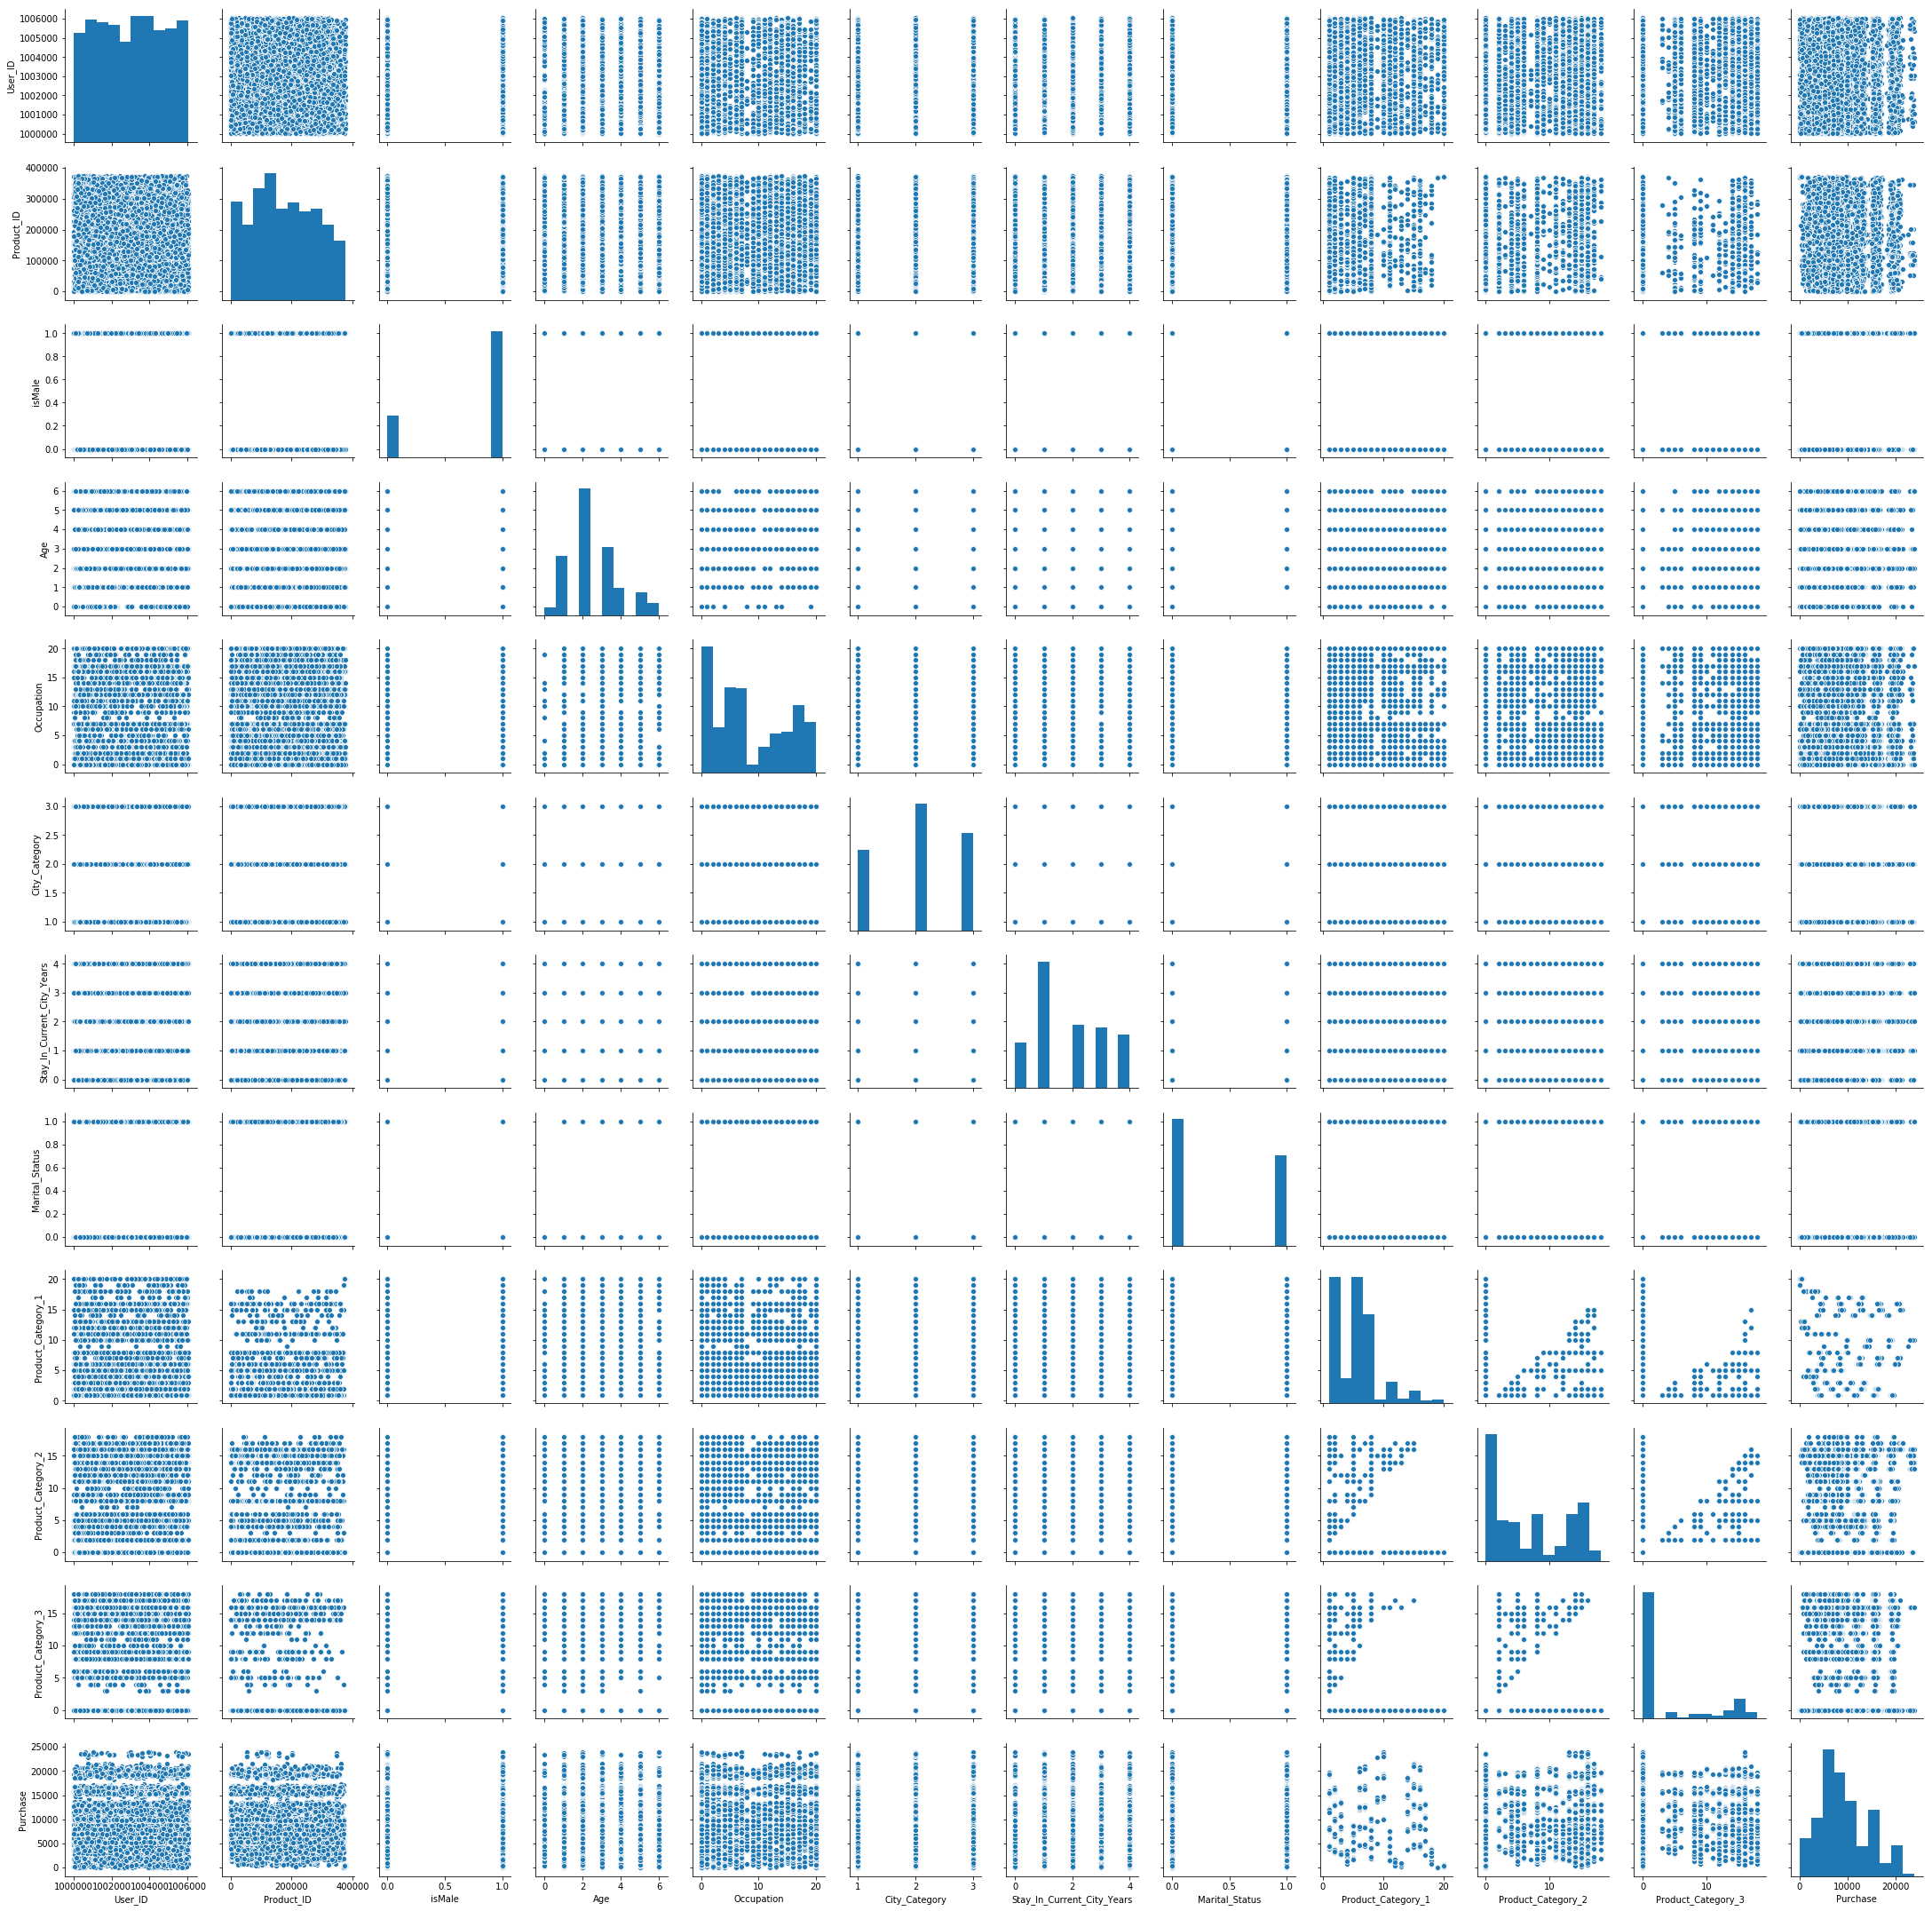

In [26]:
tempSlice = train.sample(n=10000) # Using a small slice to run a pairplot on - should give us an accurate idea of any relations while being efficient
sns.pairplot(tempSlice)

There appear to be relationships between the product categories.

In [27]:
prediction = multivar_model.predict(sm.add_constant(test.drop(columns=['Purchase','Stay_In_Current_City_Years'],axis=1)))

In [28]:
rmse(prediction,test['Purchase'])

4613.460791396466

Testing simple, single-var models

In [29]:
for c in df.columns:
    if (c == 'Purchase' or c == 'Stay_In_Current_City_Years'): continue
    X = train[c]
    y = train.Purchase
    model = sm.OLS(y,sm.add_constant(X)).fit()
    print(c)
    print('Adjusted R-Squared: '+str(model.rsquared_adj))
    prediction = model.predict(sm.add_constant(test[c]))
    print('RMSE: '+str(rmse(prediction,test['Purchase'])))
    print('\n')

User_ID
Adjusted R-Squared: 2.160630405945163e-05
RMSE: 5020.669666065025


Product_ID
Adjusted R-Squared: 0.010949628945556955
RMSE: 4994.362919693059


isMale
Adjusted R-Squared: 0.0035994667217925658
RMSE: 5011.332092794032


Age
Adjusted R-Squared: 0.0002784194787673888
RMSE: 5020.2679898791075


Occupation
Adjusted R-Squared: 0.00047078023241897693
RMSE: 5019.862382745518


City_Category
Adjusted R-Squared: 0.004004736189884173
RMSE: 5012.1182351209145


Marital_Status
Adjusted R-Squared: -1.198075775254992e-06
RMSE: 5020.724453449108


Product_Category_1
Adjusted R-Squared: 0.11805214171413025
RMSE: 4714.3579416844805


Product_Category_2
Adjusted R-Squared: 0.002624322870423579
RMSE: 5013.225685994211


Product_Category_3
Adjusted R-Squared: 0.08249142709188662
RMSE: 4802.710484557261




Simple models do not beat the basic multivariate model on RMSE.

Testing individual parameter transformations in a multivariate model.

In [30]:
df.User_ID.eq(0).any()

False

In [31]:
for c in df.columns:
    if (c == 'Purchase' or c == 'Stay_In_Current_City_Years'): continue
    print(c)
    for t in ['square','sqrt','log']:
        loopDf = df.copy()
        loopDf.drop('Stay_In_Current_City_Years',axis=1,inplace=True) #It is not significant in original model
        if t == 'square': loopDf[c+'_'+t] = loopDf[c]**2
        elif t == 'sqrt': loopDf[c+'_'+t] = np.sqrt(loopDf[c])
        elif t == 'log': 
            if loopDf[c].eq(0).any() == True: #np.log will throw a divide by 0 error if 0 exists
                print('0 in '+c+', skipping')
                continue
            else: loopDf[c+'_'+t] = np.log(loopDf[c])
        loopDf.drop(c,axis=1,inplace=True)
        loopTrain, loopTest = train_test_split(loopDf,test_size=0.3)
        X = loopTrain[c+'_'+t]
        y = loopTrain.Purchase
        model = sm.OLS(y,sm.add_constant(X)).fit()
        print(t)
        print('Adjusted R-Squared: '+str(model.rsquared_adj))
        prediction = model.predict(sm.add_constant(test[c]))
        print('RMSE: '+str(rmse(prediction,test['Purchase'])))
    print('\n')

User_ID
square
Adjusted R-Squared: 3.1697313370271374e-05
RMSE: 9911.541943839546
sqrt
Adjusted R-Squared: 1.8498798984190046e-05
RMSE: 26800563.238743257
log
Adjusted R-Squared: 1.798794361296263e-05
RMSE: 13270487926.088623


Product_ID
square
Adjusted R-Squared: 0.012519505228208772
RMSE: 5054.88472005684
sqrt
Adjusted R-Squared: 0.00789481341861975
RMSE: 642851.2027755198
log
Adjusted R-Squared: 0.004079356729510875
RMSE: 61254767.54447355


isMale
square
Adjusted R-Squared: 0.003554915077407572
RMSE: 5011.3338960101455
sqrt
Adjusted R-Squared: 0.0037902695379897766
RMSE: 5011.314517254009
0 in isMale, skipping


Age
square
Adjusted R-Squared: 0.0002228294622663718
RMSE: 5020.82908630276
sqrt
Adjusted R-Squared: 0.00025028010613870055
RMSE: 5025.440830983064
0 in Age, skipping


Occupation
square
Adjusted R-Squared: 0.00017895035274928528
RMSE: 5021.0050957207795
sqrt
Adjusted R-Squared: 0.0006084232169482062
RMSE: 5067.347667611354
0 in Occupation, skipping


City_Category
square


Individual transformations do not beat the basic multivariate model on RMSE.<br>
For certain categories that are boolean, like isMale, it is expected that transformations will not yield better results.